# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Aldhira Calysta Athalia Siahaan
- **Email:** aldhirathalia@student.ub.ac.id
- **ID Dicoding:** MC006D5X2418


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Jika ada perbedaan pola peminjaman sepeda pada setiap musim, pada musim apa sebaiknya kita menaikkan harga sewa untuk memaksimalkan keuntungan?


- Pertanyaan 2: Berapa selisih jumlah peminjaman sepeda pada hari kerja atau hari libur dan jelaskan pada pukul berapa puncak peminjaman terjadi? Analisis mengenai hal ini penting untuk membantu kita menentukan hour rate yang sesuai.


## Import Semua Packages/Library yang Digunakan

In [49]:
import warnings
warnings.filterwarnings("ignore")

#Supaya grafiknya tidak ada tulisan2 yang menghalangi

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [51]:
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

In [52]:
day_df #mencoba melihat apakah sudah sukses menyimpan data ke dalam variabel day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [53]:
hour_df #mencoba melihat apakah sudah sukses menyimpan data ke dalam variabel hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Perbedaan jumlah baris yang signifikan antara kedua dataset. Dataset day hanya memiliki  731 baris dan 16 kolom, sedangkan dataset hour memiliki 17379 baris dan 17 kolom. Hal ini disebabkan data dari day_df teragregasi berdasarkan hari, sedangkan hour_df teragregasi berdasarkan jam (setiap hari memiliki 24 entri).
- Hanya dataset hour_df yang punya kolom "hr".


### Assessing Data

In [54]:
# Melihat informasi tentang kolom dan tipe data
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

In [55]:
# Mengecek total missing values pada dataset
day_df.isna().sum()
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [56]:
print("Jumlah duplikasi pada Day Dataset: ", day_df.duplicated().sum())
print("Jumlah duplikasi pada Hour Dataset: ", hour_df.duplicated().sum())

Jumlah duplikasi pada Day Dataset:  0
Jumlah duplikasi pada Hour Dataset:  0


In [57]:
# Fungsi untuk mendeteksi outlier pada kolom cnt menggunakan metode IQR yang diajarkan oleh modul DBS
# Pencilan atau outlier bisa jadi tanda untuk kita mendeteksi pola peminjaman yang tidak biasa.

def detect_outliers(data, column_name):
    q25, q75 = np.percentile(data[column_name], 25), np.percentile(data[column_name], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = data[(data[column_name] < minimum) | (data[column_name] > maximum)]
    return outliers

# Deteksi outlier pada kolom 'cnt' di day_df
day_outliers_cnt = detect_outliers(day_df, 'cnt')

# Deteksi outlier pada kolom 'cnt' di hour_df
hour_outliers_cnt = detect_outliers(hour_df, 'cnt')

# Menampilkan hasil outliers pada kolom 'cnt'
if day_outliers_cnt.empty:
    print("Tidak ada outliers pada day_df.\n\n")
else:
    print(day_outliers_cnt)

if hour_outliers_cnt.empty:
    print("Tidak ada outliers pada hour_df.")
else:
    print(hour_outliers_cnt)

Tidak ada outliers pada day_df.


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537  2011-08-23       3   0     8  14        0        2   
10358    10359  2012-03-12       1   1     3  17        0        1   
10359    10360  2012-03-12       1   1     3  18        0        1   
10382    10383  2012-03-13       1   1     3  17        0        2   
10383    10384  2012-03-13       1   1     3  18        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16885    16886  2012-12-11       4   1    12   8        0        2   
16909    16910  2012-12-12       4   1    12   8        0        3   
16933    16934  2012-12-13       4   1    12   8        0        4   
17053    17054  2012-12-18       4   1    12   8        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
5536            1           1  0.72  0.6515  0.30    

In [58]:
#Fungsi untuk memeriksa format tanggal apakah memiliki format yang konsisten, misalnya yyyy-mm-dd
def check_date_format(df, column_name):
    invalid_dates = df[~df[column_name].str.match(r'^\d{4}-\d{2}-\d{2}$')] #Ini mengecek format adalah 4 digit-2 digit- 2 digit
    return invalid_dates

invalid_dates_hour = check_date_format(hour_df, 'dteday')
invalid_dates_day = check_date_format(day_df, 'dteday')

# Fungsi untuk memeriksa nilai jam (hr) di luar rentang yang valid yaitu antara 0 dan 23
def check_invalid_hours(df, column_name):
    invalid_hours = df[(df[column_name] < 0) | (df[column_name] > 23)]
    return invalid_hours

invalid_hours_hour = check_invalid_hours(hour_df, 'hr')

# Fungsi untuk memeriksa nilai numerik yang berada di luar rentang yang valid
def check_invalid_numerics(df, column_name, min_value, max_value):
    invalid_values = df[(df[column_name] < min_value) | (df[column_name] > max_value)]
    return invalid_values

invalid_temp_hour = check_invalid_numerics(hour_df, 'temp', 0, 1)
invalid_temp_day = check_invalid_numerics(day_df, 'temp', 0, 1)
invalid_hum_hour = check_invalid_numerics(hour_df, 'hum', 0, 1)
invalid_hum_day = check_invalid_numerics(day_df, 'hum', 0, 1)
invalid_windspeed_hour = check_invalid_numerics(hour_df, 'windspeed', 0, 1)
invalid_windspeed_day = check_invalid_numerics(day_df, 'windspeed', 0, 1)

#Setelah di cek, maka kita sebenarnya dapat memunculkan data mana saja yang tidak valid. Namun, kita akan atur supaya langsung print "Tidak ada data invalid." jika tidak ada data invalid pada setiap kolom.
# Fungsi untuk mencetak hasil dengan pengecekan jika data invalid kosong
def print_invalid_data(invalid_data, data_name):
    if invalid_data.empty:
        print(f"Tidak ada data invalid pada {data_name}.")
    else:
        print(f"Invalid data pada {data_name}:")
        print(invalid_data)

# Menampilkan hasil deteksi invalid values
print_invalid_data(invalid_dates_hour, "Tanggal (Hour Data)")
print_invalid_data(invalid_dates_day, "Tanggal (Day Data)")
print_invalid_data(invalid_hours_hour, "Jam (Hour Data)")
print_invalid_data(invalid_temp_hour, "Suhu (Hour Data)")
print_invalid_data(invalid_temp_day, "Suhu (Day Data)")
print_invalid_data(invalid_hum_hour, "Kelembaban (Hour Data)")
print_invalid_data(invalid_hum_day, "Kelembaban (Day Data)")
print_invalid_data(invalid_windspeed_hour, "Kecepatan Angin (Hour Data)")
print_invalid_data(invalid_windspeed_day, "Kecepatan Angin (Day Data)")

Tidak ada data invalid pada Tanggal (Hour Data).
Tidak ada data invalid pada Tanggal (Day Data).
Tidak ada data invalid pada Jam (Hour Data).
Tidak ada data invalid pada Suhu (Hour Data).
Tidak ada data invalid pada Suhu (Day Data).
Tidak ada data invalid pada Kelembaban (Hour Data).
Tidak ada data invalid pada Kelembaban (Day Data).
Tidak ada data invalid pada Kecepatan Angin (Hour Data).
Tidak ada data invalid pada Kecepatan Angin (Day Data).


In [59]:
# Mengecek informasi min, mean, max pada dataset day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [60]:
# Mengecek informasi min, mean, max pda dataset hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data pada kolom dteday bukan berupa "datetime" melainkan object. Pilihan terbaik adalah mengonversinya ke datetime agar bisa melakukan analisis berbasis waktu.Selain itu, data-data yang lain mengandung angka dan tidak ada yang bersifat unik (string).
- Tidak ada missing value atau nilai null, yang berarti data sudah lengkap dan siap untuk dianalisis lebih lanjut tanpa perlu penanganan nilai yang hilang.
-  Tidak ada data yang duplikat pada kedua dataset day_df dan hour_df karena setiap baris dalam dataset ini adalah unik dan tidak ada entri yang terulang.
- Tidak ada outliers pada day_df, tetapi ada 505 baris outliers pada hour_df. Ini berarti bahwa pencatatan peminjaman berdasarkan jam menunjukkan bahwa ada jam-jam tertentu yang memiliki penyewaan sepeda yang sangat tinggi atau sangat rendah dibandingkan dengan data lainnya. Hal ini kemungkinan dipengaruhi oleh faktor-faktor tertentu, seperti cuaca ekstrem atau kejadian besar lainnya. Oleh karena itu, sebaiknya baris ini **tidak perlu** dibersihkan maupun diatasi.
- Semua dataset baik hour_df maupun day_df tidak memiliki data invalid.
- Dari tabel informasi describe kita tahu bahwa beberapa data sudah dinormalisasi.

### Cleaning Data

In [61]:
# Membuat salinan dari day_df dan hour_df supaya syntax info yang ada di atas tetap dapat menampilkan tipe data awal sebelum cleaning
day_df_cleaned = day_df.copy()
hour_df_cleaned = hour_df.copy()

# Mengubah kolom 'dteday' menjadi tipe datetime pada day_df_cleaned
day_df_cleaned['dteday'] = pd.to_datetime(day_df_cleaned['dteday'])

# Mengubah kolom 'dteday' menjadi tipe datetime pada hour_df_cleaned
hour_df_cleaned['dteday'] = pd.to_datetime(hour_df_cleaned['dteday'])

# Memeriksa tipe data setelah konversi
print(day_df_cleaned.info())
print(hour_df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Kolom dteday sudah merupakan data tipe datetime.
- Tidak ada penanganan khusus untuk outlier. Selain itu data juga tidak memiliki missing value, duplicate, maupun data invalid.


## Exploratory Data Analysis (EDA)

### Explore Parameter Statistik dari Data

In [62]:
#Karena ada non numerik yaitu dteday yang merupakan datetime maka kita akan menggunakan include='all'
# Deskripsi statistik untuk day_df
day_df_cleaned.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [63]:
# Deskripsi statistik untuk hour_df
hour_df_cleaned.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

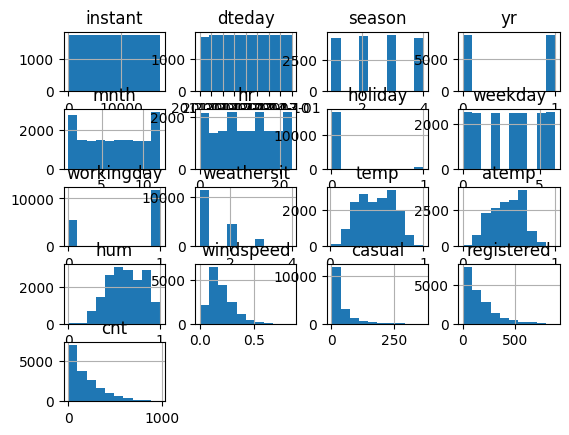

In [64]:
hour_df_cleaned.hist()

Beirkut penjelasan mengenai masing-masing grafik dari dataset hour_df:

1.   Instant: Kolom ini merupakan indeks untuk setiap entri, jadi distribusinya sangat merata.

2.   Dteday (Tanggal): Distribusi dari kolom ini terlihat sangat merata  menandakan bahwa data tersebar rata sepanjang periode yang tercatat.

3.   Season (Musim): Pada kolom musim (1: Spring, 2: Summer, 3: Fall, 4: Winter), distribusinya terlihat cukup merata dengan sedikit peningkatan pada musim gugur (fall).

4.   Yr (Tahun): Kolom ini hanya memiliki dua nilai (0: 2011 dan 1: 2012), dan distribusinya sangat seimbang, masing-masing sekitar setengah dari total data.

5.   Month:
Distribusi menunjukkan puncak pada bulan-bulan tertentu.

6.   Hr (hour):
Distribusi juga memiliki jam tertentu yang menjadi favorit konsumen untuk meminjam sepeda.

7.   Holiday (Hari Libur): Kolom ini menunjukkan distribusi yang sangat tidak seimbang, dengan banyaknya data pada hari-hari bukan libur dan sedikit data pada hari libur.

8.   Weekday (Hari dalam Seminggu): Data untuk kolom hari menunjukkan pola distribusi yang uniform atau seragam.

9.   Workingday (Hari Kerja): Distribusi sangat tidak seimbang. Hari kerja lebih banyak terjadi dibandingkan dengan hari libur atau akhir pekan.

10.    Weathersit (Situasi Cuaca): Kolom ini menunjukkan distribusi dengan banyak data pada kondisi cuaca ringan (clear), dan akan semakin sedikit/berkurang pada cuaca yang semakin buruk/ekstrem.

11.   Temp (Temperatur): Distribusi temperatur menunjukkan pola agak normal, dengan grafik yang tinggi pada nilai tengah dan sedikit data pada suhu ekstrem.

12.   Atemp (Perasaan Temperatur): Mirip dengan temperatur, distribusi pada kolom ini cenderung mengikuti distribusi normal, dengan lebih banyak data pada nilai yang lebih rendah.

13.   Hum (Kelembaban): Kolom ini memiliki distribusi yang sedikit miring ke kanan, menunjukkan banyak data pada kelembaban rendah dan sedikit pada kelembaban tinggi.

14.   Windspeed (Kecepatan Angin): Distribusinya cenderung sangat miring ke kanan, dengan sebagian besar data terdistribusi di kecepatan angin rendah, dan lebih sedikit pada kecepatan angin tinggi.

15.   Casual (Pengguna Kasual): Distribusi pada kolom ini sangat miring ke kanan, menunjukkan bahwa kebanyakan data berasal dari pengguna kasual dengan jumlah sedikit pada jumlah yang lebih tinggi.

16.   Registered (Pengguna Terdaftar): Seperti halnya kolom casual, distribusi pengguna terdaftar juga miring ke kanan, dengan banyaknya data pada penggunaan yang lebih rendah.

17.   Cnt (Jumlah Sepeda yang Disewa): Distribusi pada kolom cnt menunjukkan pola miring ke kanan, dengan sedikit data pada angka yang lebih tinggi dan lebih banyak pada angka yang lebih rendah.


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

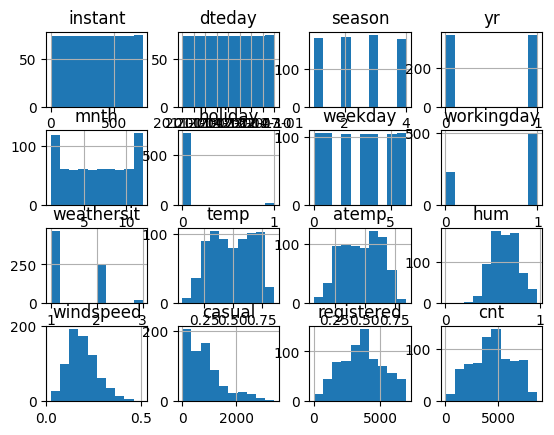

In [65]:
day_df_cleaned.hist()

Masing-masing grafik distribusi dari dataset day_df ini menunjukkan pola yang sama seperti penjelasan saya di grafik dataset hour_df sebelumnya, namun sedikit berbeda detail bentuk grafiknya.


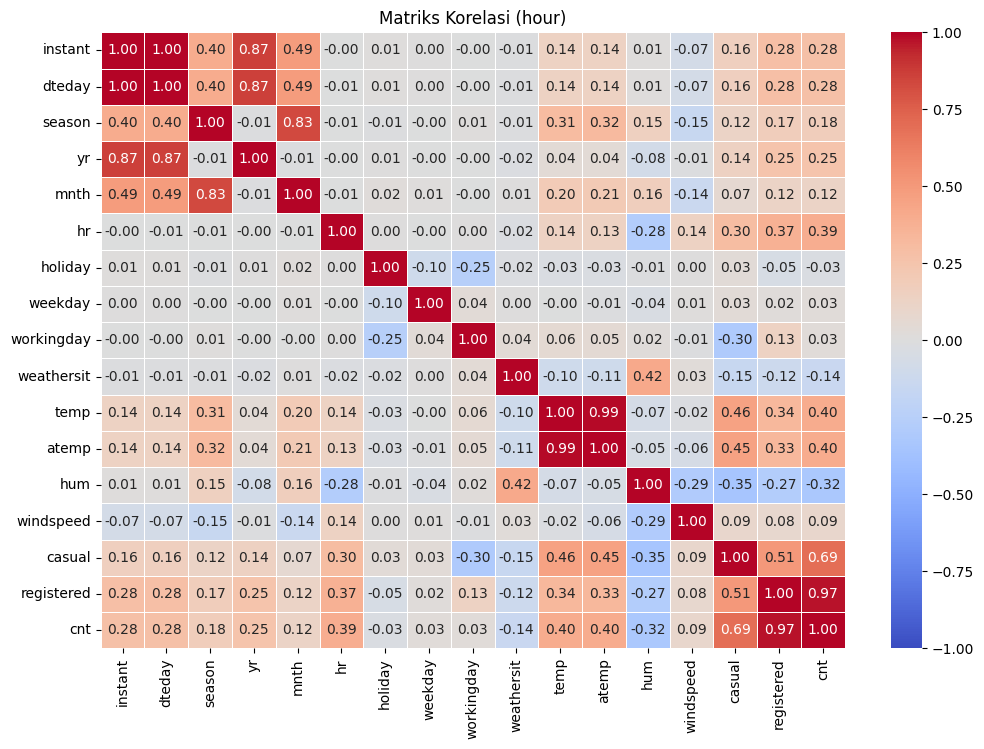

In [66]:
#Buat matriks korelasi dulu lalu heatmap supaya enak untuk dilihat maupun dianalisis.
corr_matrix1=hour_df_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriks Korelasi (hour)')

plt.show()

Semakin gelap warnanya maka semakin kuat hubungan antar kolom pada data hourly, contoh beberapa kolom yang berhubungan sangat kuat satu sama lain adalah:
1.   instant-dteday
2.   season-month
3.   casual-cnt
4.   registered-cnt
5.   temp-atemp
6.   year-dateday
7.   hum-weathersit
8.   dll.

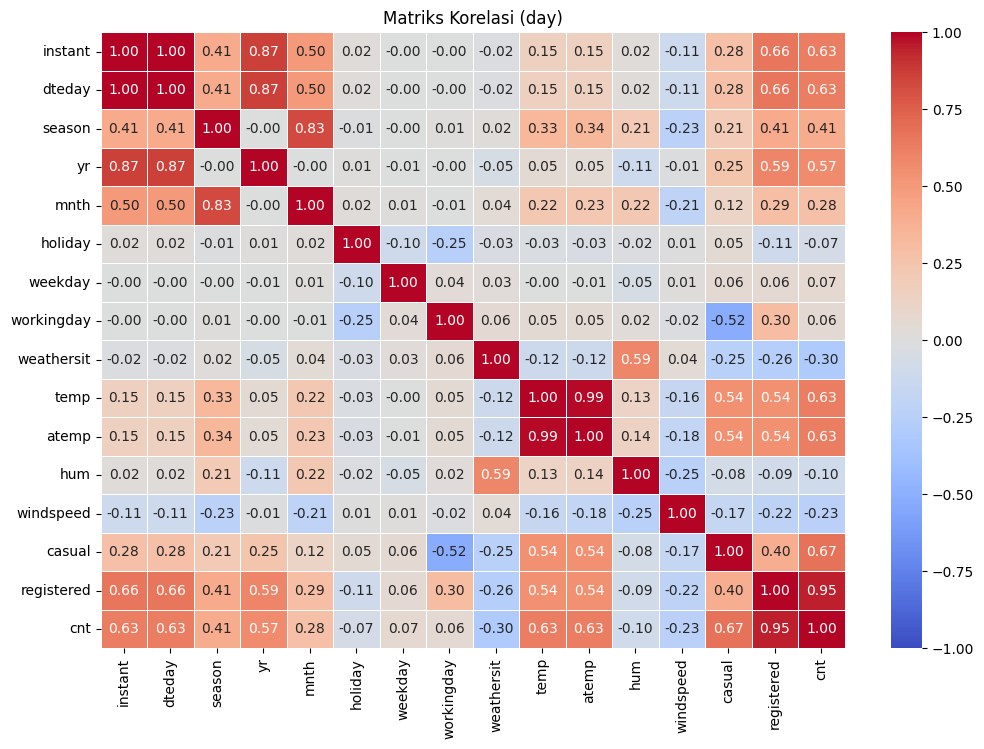

In [67]:
#Buat matriks korelasi dulu lalu heatmap
corr_matrix2=day_df_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriks Korelasi (day)')

plt.show()

Semakin gelap warnanya maka semakin kuat hubungan antar kolom pada data harian atau daily, contoh beberapa kolom yang berhubungan sangat kuat satu sama lain adalah:
1.   instant-dteday
2.   season-month
3.   casual-cnt
4.   registered-cnt
5.   temp-atemp
6.   year-dateday
7.   hum-weathersit
8.   dll.

### Explore Informasi dari Pengurutan Data

In [68]:
day_df_cleaned.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


In [69]:
hour_df_cleaned.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14964,14965,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
14748,14749,2012-09-11,3,1,9,17,0,2,1,1,0.70,0.6364,0.28,0.0000,168,802,970
14725,14726,2012-09-10,3,1,9,18,0,1,1,1,0.62,0.6212,0.35,0.2985,111,857,968
15084,15085,2012-09-25,4,1,9,17,0,2,1,1,0.66,0.6212,0.39,0.2836,107,860,967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,11305,2012-04-21,2,1,4,5,0,6,0,1,0.50,0.4848,0.82,0.2537,0,1,1
435,436,2011-01-20,1,0,1,4,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1
434,435,2011-01-20,1,0,1,3,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1
1041,1042,2011-02-16,1,0,2,3,0,3,1,2,0.20,0.1970,0.47,0.1940,0,1,1



*   Peminjaman sepeda secara harian paling banyak sebanyak 8714, sedangkan secara jam paling banyak sebanyak 977.

### Explore Informasi dari Pengelompokan Data

In [70]:
hour_df_cleaned.groupby(by="holiday").mean()

,instant,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
holiday,,,,,,,,,,,,,,,,
0,8677.286747,2012-01-01 15:21:17.777119488,2.503466,0.501985,6.526868,11.546182,3.038924,0.702944,1.427158,0.497893,0.476691,0.62758,0.190014,35.408377,155.020203,190.42858
1,9119.174000,2012-01-20 03:50:24.000000000,2.440000,0.522000,6.906000,11.566000,1.814000,0.000000,1.362000,0.466400,0.444850,0.61536,0.192932,44.718000,112.152000,156.87000




*   Hari Biasa (holiday = 0) cenderung memiliki lebih banyak sepeda yang disewa (190), dengan lebih banyak pengguna terdaftar (155), meskipun ada sedikit lebih banyak pengguna kasual (35) pada hari libur.
*   Hari Libur (holiday = 1) menunjukkan sedikit penurunan dalam jumlah sepeda yang disewa dibandingkan hari biasa (156) dengan pengguna terdaftar yang juga menurun (112) meskipun rata-rata pengguna kasual (44) lebih banyak dari hari biasa.

In [71]:
day_df_cleaned.groupby(by="holiday").mean()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
holiday,,,,,,,,,,,,,,,
0,365.414085,2011-12-31 09:56:16.901408512,2.498592,0.50000,6.508451,3.032394,0.704225,1.398592,0.496283,0.475264,0.628284,0.190402,841.771831,3685.332394,4527.104225
1,385.809524,2012-01-20 19:25:42.857142784,2.428571,0.52381,6.904762,1.809524,0.000000,1.285714,0.465012,0.443573,0.614704,0.193319,1064.714286,2670.285714,3735.000000


Jumlah rata-rata data harian lebih banyak berlipat-lipat daripada data per-jam. Namun, kesimpulannya tetap sama saja.

*   Hari Biasa (holiday = 0) cenderung memiliki lebih banyak sepeda yang disewa, terutama dari pengguna terdaftar.
*   Hari Libur (holiday = 1) menunjukkan lebih banyak pengguna kasual yang menyewa sepeda, namun dengan jumlah total sewa sepeda yang lebih rendah dibandingkan hari biasa.

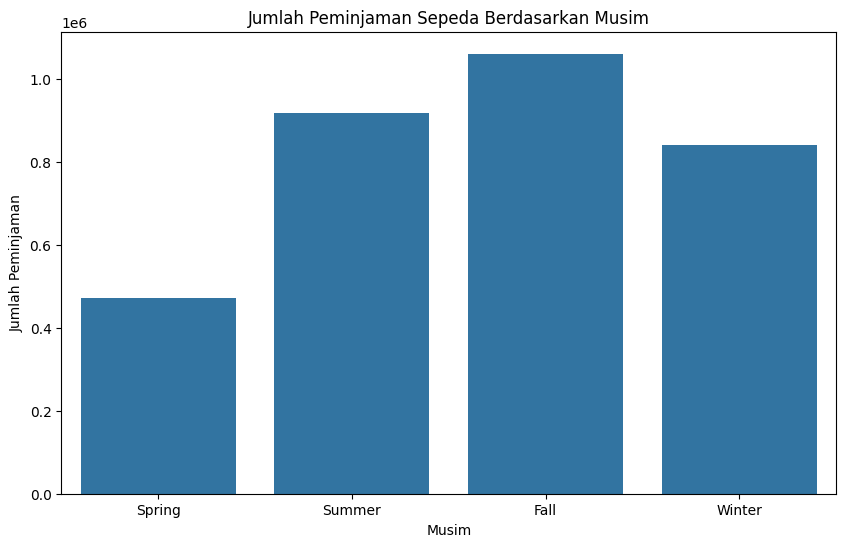

In [72]:
# Menghitung jumlah peminjaman sepeda berdasarkan musim (season)
season_analysis = day_df_cleaned.groupby('season')['cnt'].sum().reset_index()

# Visualisasi jumlah peminjaman sepeda berdasarkan musim
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='cnt', data=season_analysis)
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()


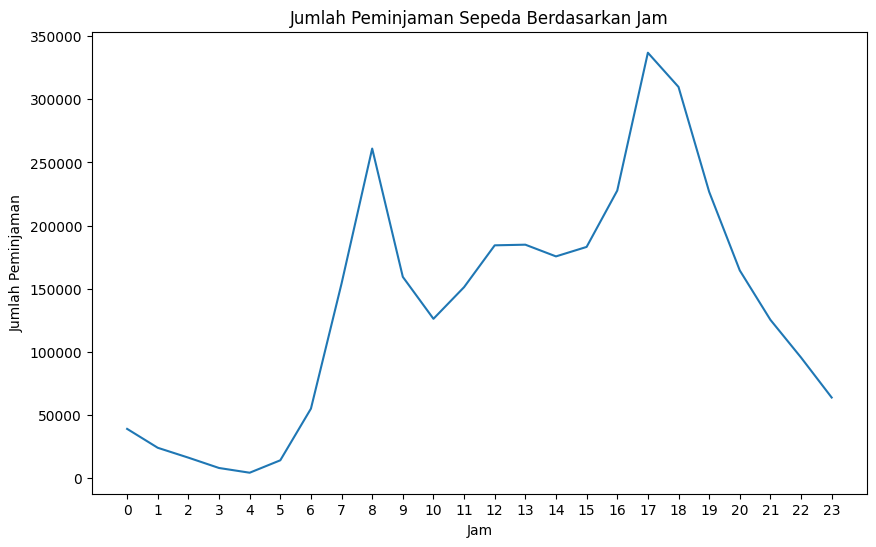

In [73]:
# Menghitung jumlah peminjaman sepeda berdasarkan jam (hr)
hour_analysis = hour_df_cleaned.groupby('hr')['cnt'].sum().reset_index()

# Visualisasi jumlah peminjaman sepeda berdasarkan jam
plt.figure(figsize=(10,6))
sns.lineplot(x='hr', y='cnt', data=hour_analysis)
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.show()


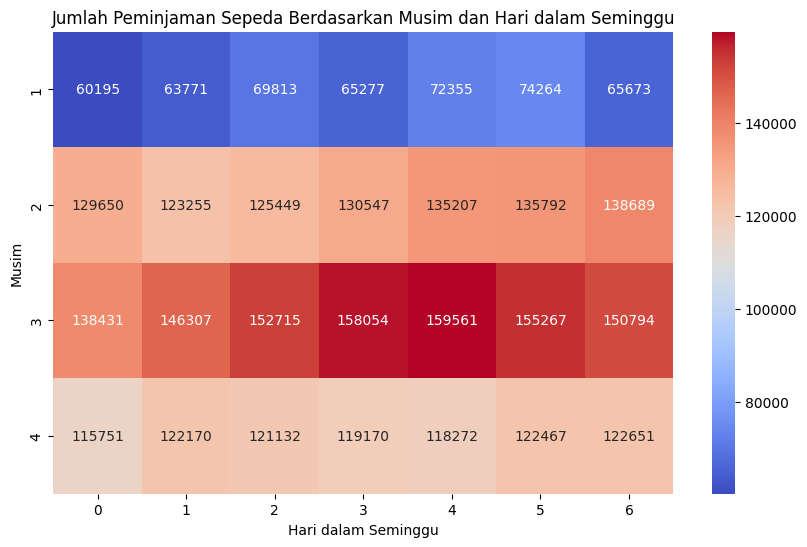

In [74]:
# Pivot table jumlah peminjaman sepeda berdasarkan musim dan hari dalam seminggu
pivot_season_weekday = day_df_cleaned.pivot_table(values='cnt', index='season', columns='weekday', aggfunc='sum')

# Visualisasi pivot table
plt.figure(figsize=(10,6))
sns.heatmap(pivot_season_weekday, annot=True, cmap='coolwarm', fmt='g')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim dan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Musim')
plt.show()


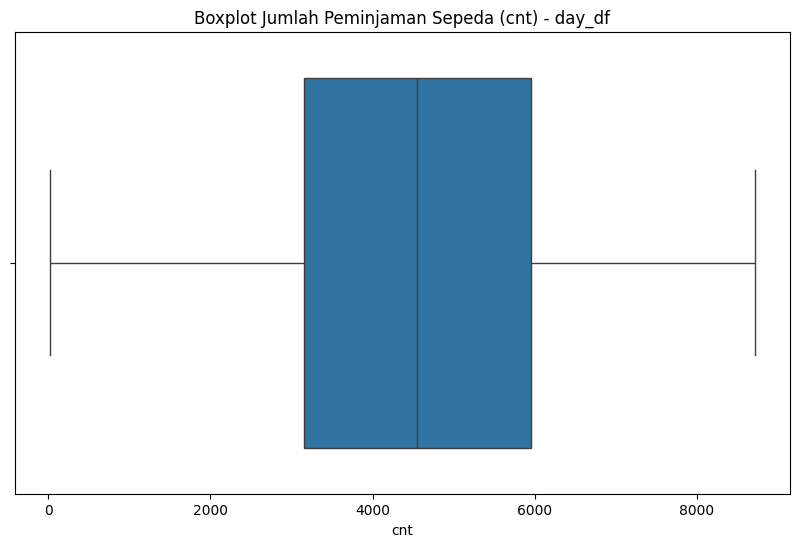

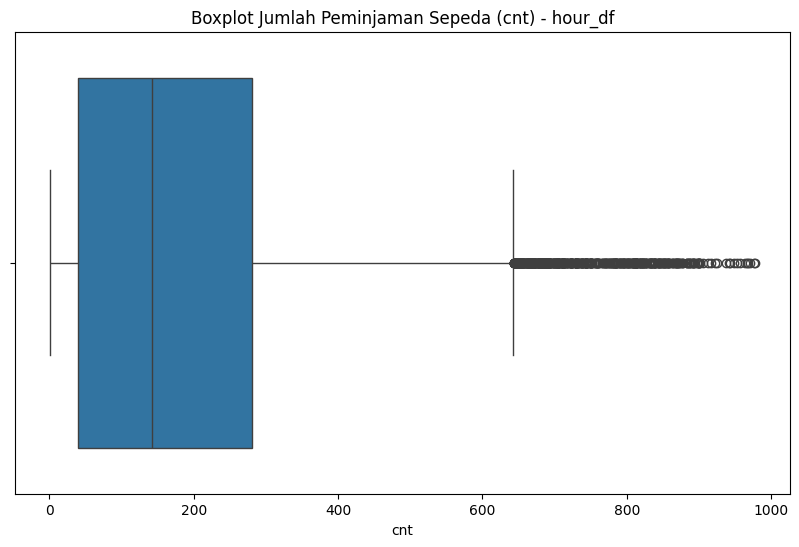

In [75]:
# Boxplot untuk mendeteksi outliers pada 'cnt' di day_df
plt.figure(figsize=(10,6))
sns.boxplot(x=day_df_cleaned['cnt'])
plt.title('Boxplot Jumlah Peminjaman Sepeda (cnt) - day_df')
plt.show()

# Boxplot untuk mendeteksi outliers pada 'cnt' di hour_df
plt.figure(figsize=(10,6))
sns.boxplot(x=hour_df_cleaned['cnt'])
plt.title('Boxplot Jumlah Peminjaman Sepeda (cnt) - hour_df')
plt.show()


**Insight:**
- Kolom season memilikik rata-rata (mean) adalah 2.496, yang berarti musim Summer (nilai 2) sedikit lebih sering muncul.
- Kolom yr memiliki rata-rata sebesar 0.500684, yang berarti ada hampir setengah data dari tahun 2011 dan setengahnya lagi dari tahun 2012.
- Holiday dengan nilai mean = 0.0287 menunjukkan bahwa sebagian besar data bukan hari libur.
- Nilai rata-rata weekday 2.997 menunjukkan bahwa sebagian besar data adalah hari-hari awal minggu (Senin, Selasa, Rabu). Rata-rata mendekati 3 (Rabu)
- Rata-rata kolom workingday adalah 0.684, yang berarti sebagian besar data adalah hari kerja.
- Rata-rata weathersit 1.5 menunjukkan bahwa kondisi cuaca yang lebih sering terjadi adalah yang relatif lebih baik, yaitu kondisi cuaca 1 (Clear, Few clouds).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Jika ada perbedaan pola peminjaman sepeda pada setiap musim, pada musim apa sebaiknya kita menaikkan harga sewa untuk memaksimalkan keuntungan?

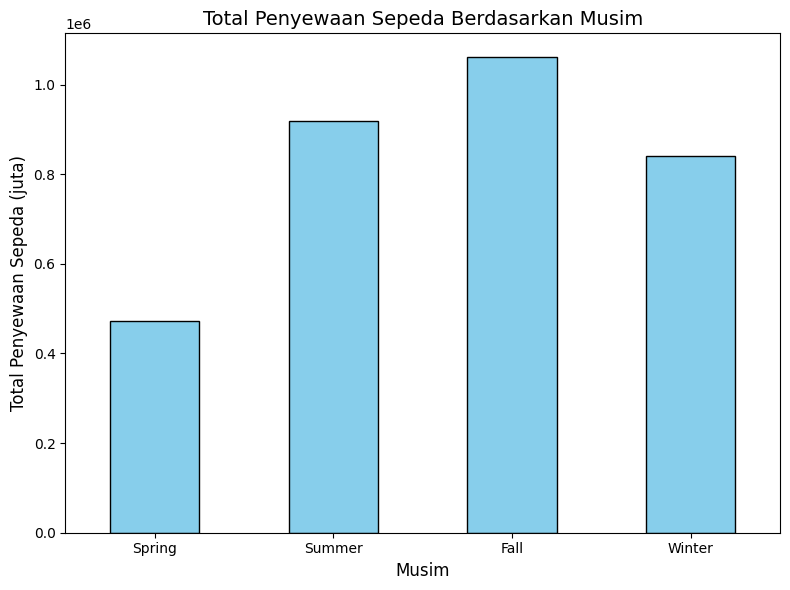

In [76]:
# Mengelompokkan data berdasarkan musim dan menghitung total penyewaan sepeda
seasonal_sales = day_df_cleaned.groupby('season')['cnt'].sum()

# Membuat grafik batang
plt.figure(figsize=(8, 6))
seasonal_sales.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan label dan judul
plt.title('Total Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda (juta)', fontsize=12)

# Menambahkan label musim
plt.xticks(ticks=range(4), labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)

# Menampilkan grafik
plt.tight_layout()
plt.show()

### Pertanyaan 2:

Berapa selisih jumlah peminjaman sepeda pada hari kerja atau hari libur dan jelaskan pada pukul berapa puncak peminjaman terjadi? Analisis mengenai hal ini penting untuk membantu kita menentukan hour rate yang sesuai.

In [77]:
# Menghitung total peminjaman sepeda berdasarkan hari kerja dan libur
total_workingday = day_df_cleaned[day_df_cleaned['workingday'] == 1]['cnt'].sum()
total_holiday = day_df_cleaned[day_df_cleaned['workingday'] == 0]['cnt'].sum()

# Menghitung selisih peminjaman antara hari kerja dan hari libur
selisih = total_workingday - total_holiday

print("Selisih peminjaman sepeda antara hari kerja dan hari libur:", selisih)

Selisih peminjaman sepeda antara hari kerja dan hari libur: 1292141


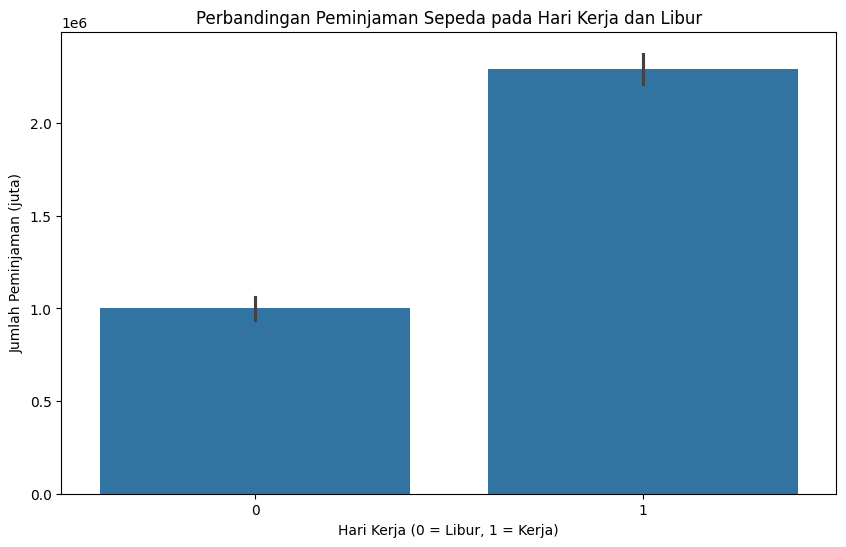

In [78]:
# Membandingkan jumlah peminjaman sepeda antara hari kerja dan hari libur

plt.figure(figsize=(10,6))
sns.barplot(x='workingday', y='cnt', data=day_df_cleaned, estimator=np.sum)
plt.title('Perbandingan Peminjaman Sepeda pada Hari Kerja dan Libur')
plt.xlabel('Hari Kerja (0 = Libur, 1 = Kerja)')
plt.ylabel('Jumlah Peminjaman (juta)')
plt.show()

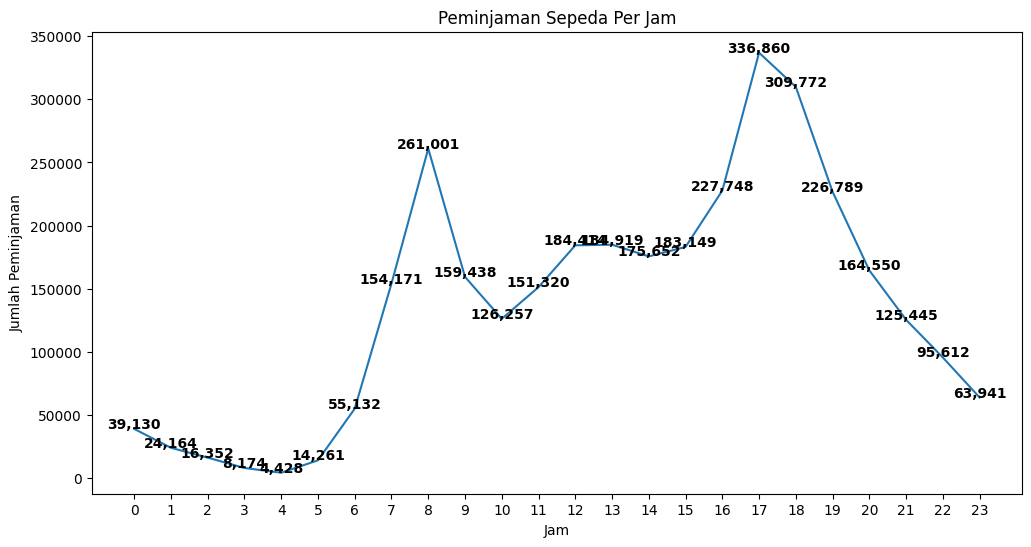

In [79]:
# Mengidentifikasi jam puncak peminjaman pada hari kerja dan libur
# Plot garis jumlah peminjaman per jam:

plt.figure(figsize=(12,6))
sns.lineplot(x='hr', y='cnt', data=hour_df_cleaned, estimator=np.sum, ci=None)
plt.title('Peminjaman Sepeda Per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')

# Menambahkan label untuk setiap titik data pada grafik
for i in range(24):
    # Menghitung total peminjaman pada setiap jam untuk  ditaruh di grafik
    total_peminjaman = hour_df_cleaned[hour_df_cleaned['hr'] == i]['cnt'].sum()
    # Menambahkan teks pada titik data di grafik
    plt.text(i, total_peminjaman + 500, f'{total_peminjaman:,}',
             horizontalalignment='center', size=10, color='black', weight='semibold')


plt.xticks(range(0, 24, 1))
plt.show()

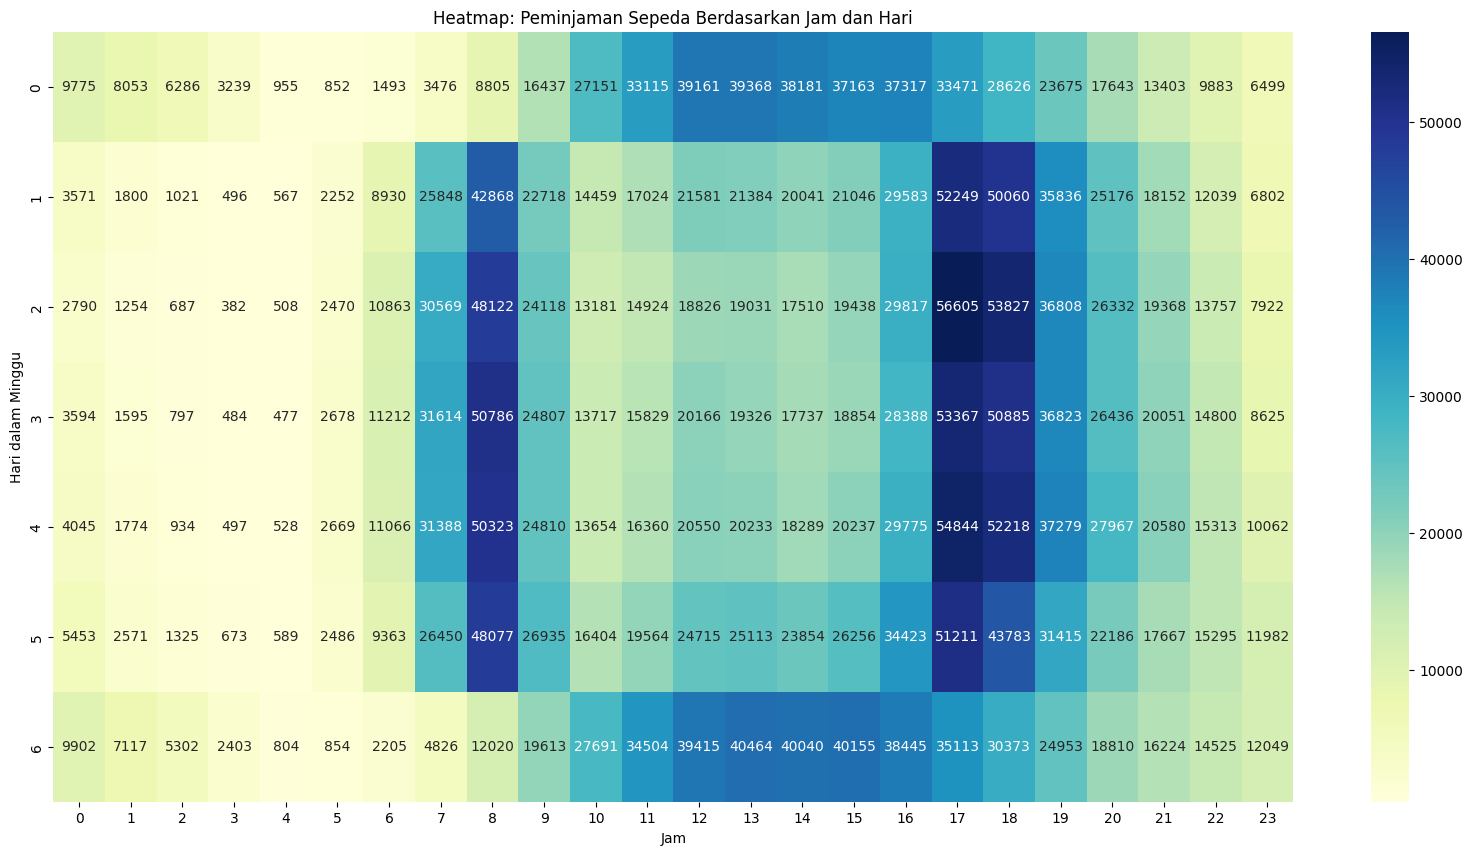

In [80]:
# Menampilkan heatmap untuk jam dan hari
pivot = hour_df_cleaned.pivot_table(values='cnt', index='weekday', columns='hr', aggfunc=np.sum)
plt.figure(figsize=(20,10))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="g")
plt.title('Heatmap: Peminjaman Sepeda Berdasarkan Jam dan Hari')
plt.xlabel('Jam')
plt.ylabel('Hari dalam Minggu')
plt.show()

###**Insight untuk Menjawab Pertanyaan:**

1. **Perbandingan Peminjaman Sepeda pada Hari Kerja dan Libur**
   Peminjaman sepeda pada hari kerja jauh lebih tinggi dibandingkan dengan hari libur, dengan **selisih sekitar 1,29** juta sepeda. Ini menunjukkan bahwa ada lebih banyak orang yang menggunakan sepeda pada hari kerja dibandingkan saat libur.

   Berdasarkan temuan ini, harga sewa sepeda **dapat dinaikkan pada hari kerja** untuk **memaksimalkan keuntungan**, mengingat permintaan yang lebih tinggi pada hari tersebut untuk memaksimalkna keuntungan. Atau strategi sebaliknya, harga yang lebih terjangkau mungkin juga diperlukan pada hari kerja untuk mendorong lebih banyak penggunaan meskipun mengurangi keuntungan.

2. **Pola Peminjaman Sepeda Per Jam**
   Dari grafik garis, terlihat bahwa puncak peminjaman sepeda terjadi pada jam **pagi sekitar pukul 8** dan **sore sekitar pukul 17**, yang mungkin berhubungan dengan jam-jam sibuk di tempat kerja dan kegiatan sehari-hari.

   Peminjaman sepeda **menurun secara signifikan pada jam malam**, terutama setelah jam 21:00. Dengan melihat distribusi ini, kita dapat mengevaluasi waktu dan hari dengan permintaan tertinggi dan menggunakan data tersebut untuk **menaikkan harga sewa di waktu yang lebih sibuk atau saat permintaan lebih tinggi** (seperti jam sibuk atau hari kerja).

3. **Peningkatan Peminjaman Musiman**
   Berdasarkan data, musim **Summer dan Fall** mungkin memiliki tingkat peminjaman yang lebih tinggi (berdasarkan grafik sebelumnya), yang dapat dijadikan pertimbangan untuk menaikkan harga sewa pada musim tersebut, sementara pada musim Winter, yang menunjukkan permintaan lebih rendah, harga dapat diturunkan untuk menarik lebih banyak penyewa.

## Analisis Lanjutan (Opsional): Clustering

###Manual Clustering

Tujuan dari teknik analisis ini adalah untuk mengelompokkan penyewaan sepeda berdasarkan waktu, yang bisa memberikan wawasan mengenai kapan penyewaan sepeda paling banyak terjadi.

Dengan menggunakan fungsi manual clustering, kita mengelompokkan data berdasarkan jam ke dalam kategori Pagi, Siang, dan Malam. Analisis ini dapat menjadi dasar untuk menentukan jam buka dan tutup yang terbaik untuk memaksimalkan pengeluaran terhadap listrik dan biaya gedung.


In [81]:
# Mendefinisikan fungsi untuk manual clustering jam ke dalam pagi, siang, dan malam
def kategorikan_waktu(jam):
    if 0 <= jam <= 11:
        return 'Pagi'
    elif 11 < jam <= 18:
        return 'Siang'
    else:
        return 'Malam'

# Menerapkan fungsi ke kolom 'hr' dan membuat kolom baru 'waktu_hari'
hour_df_cleaned['waktu_hari'] = hour_df_cleaned['hr'].apply(kategorikan_waktu)

total_cnt_per_waktu = hour_df_cleaned.groupby('waktu_hari')['cnt'].sum()

# Tampilkan hasilnya
print(total_cnt_per_waktu)

waktu_hari
Malam     676337
Pagi     1013828
Siang    1602514
Name: cnt, dtype: int64


###Binning Clustering

Tujuan dari teknik analisis ini adalah untuk mengelompokkan jumlah penyewaan sepeda (cnt) ke dalam kategori tertentu berdasarkan rentang nilai menggunakan teknik binning.

Teknik ini berguna untuk mengidentifikasi bagaimana penyewaan sepeda tersebar dalam kategori tertentu, misalnya untuk mengetahui kapan penyewaan sepeda "Sepi", "Normal", "Ramai", atau "Sangat Ramai". Hasilnya dapat digunakan untuk penentuan kenaikan hour rate atau pemaksimalan jumlah pekerja pada jam yang ramai.

In [82]:
# Mendefinisikan batasan bin dan label untuk dataset hourly
hour_bins = [50, 200, 500, 900, float('inf')]  # Rentang untuk dataset hourly
hour_labels = ['Sepi', 'Normal', 'Ramai', 'Sangat Ramai']

# Mendefinisikan batasan bin dan label untuk dataset daily
day_bins = [500, 2000, 5000, 9000, float('inf')]  # Rentang untuk dataset daily
day_labels = ['Sepi', 'Normal', 'Ramai', 'Sangat Ramai']

# Menerapkan binning pada dataset hourly dan daily
hour_df_cleaned['cnt_binned'] = pd.cut(hour_df_cleaned['cnt'], bins=hour_bins, labels=hour_labels)
day_df_cleaned['cnt_binned'] = pd.cut(day_df_cleaned['cnt'], bins=day_bins, labels=day_labels)

# Menghitung jumlah total kategori untuk dataset hourly dan daily
hour_binned_count = hour_df_cleaned['cnt_binned'].value_counts()
day_binned_count = day_df_cleaned['cnt_binned'].value_counts()

# Tampilkan hasilnya
print("Jumlah kategori untuk dataset hourly:")
print(hour_binned_count)

print("\nJumlah kategori untuk dataset daily:")
print(day_binned_count)

Jumlah kategori untuk dataset hourly:
cnt_binned
Sepi            5908
Normal          5316
Ramai           1261
Sangat Ramai      18
Name: count, dtype: int64

Jumlah kategori untuk dataset daily:
cnt_binned
Normal          347
Ramai           286
Sepi             95
Sangat Ramai      0
Name: count, dtype: int64


### Kesimpulan Analisis Tambahan

**Insight:**
- Dataset hourly paling rendah adalah kategori "Sangat Ramai", dan paling banyak "Sepi".
- Pada dataset harian atau daily, kategori "Sangat Ramai" tidak ditemukan sama sekali, dan kategori "Sepi" menunjukkan jumlah yang sangat rendah.
- Secara umum, jumlah penyewaan sepeda lebih tinggi pada siang hari dan paling sedikit di malam hari dalam pengelompokan manual.

## Conclusion

- Conclution pertanyaan 1:
  Ada selisih yang sangat minim pada pola peminjaman sepeda pada setiap musim dengan jumlah peminjaman paling tinggi pada saat musim gugur. Jadi, saat musim gugur (fall) sebaiknya kita menaikkan harga sewa untuk memaksimalkan keuntungan.

- Conclution pertanyaan 2:
  Selisih peminjaman sepeda antara hari kerja dan hari libur menunjukkan bahwa jumlah peminjaman pada hari kerja lebih tinggi, dengan selisih sekitar 1,29 juta sepeda. Puncak peminjaman terjadi pada pukul 8 pagi dan pukul 5 sore, yang berhubungan dengan jam-jam sibuk di tempat kerja dan aktivitas sehari-hari. Dengan mempertimbangkan pola ini, strategi harga sewa sepeda yang dinamis bisa diterapkan untuk menaikkan harga pada jam sibuk (pagi dan sore) serta pada hari kerja, sementara harga lebih terjangkau bisa ditawarkan pada jam malam atau hari libur.

#Install berkas data

In [47]:
# Ini bukan bagian cleaning, tapi kita akan download data yang telah di cleaning untuk digunakan file csvnya pada dashboard streamlit.
# Yang digunakan untuk web hanya file harian/daily
from google.colab import files
# File main_data.csv:
day_df_cleaned.to_csv('main_data.csv', index=False)
files.download('main_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>